In [1]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules



"""

'\nPurpose: To Run the proofreading of neurons in the \ntest set and measure the precision and recall of the new rules\n\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-30 20:51:37,516 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-30 20:51:37,532 - settings - Setting database.user to celiib
INFO - 2021-04-30 20:51:37,533 - settings - Setting database.password to newceliipass
INFO - 2021-04-30 20:51:37,536 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-30 20:51:37,536 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-30 20:51:37,546 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-30 20:51:37,949 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-30 20:51:37,954 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-30 20:51:37,955 - settings - Setting database.user to celiib
INFO - 2021-04-30 20:51:37,955 - settings - Setting database.password to newceliipass
INFO - 2021-04-30 20:51:37,956 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-30 20:51:37,956 - settings - Setting database.user to celiib
INFO - 2021-04-30 20:51:37,957 - settings - Setting database.password to newceliipass
INFO - 2021-04-30 20:51:37,959 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-30 20:51:38,493 - settings - Setting enable_python_native_blobs to True


In [4]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-30 20:51:38,601 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-30 20:51:38,602 - settings - Setting database.user to celiib
INFO - 2021-04-30 20:51:38,603 - settings - Setting database.password to newceliipass
INFO - 2021-04-30 20:51:38,607 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-30 20:51:39,408 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [6]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [7]:
segment_ids = minnie.AutoProofreadValidationBorderNeurons().fetch("segment_id")

In [8]:
job_idx = 0
job_step = 5
segments_to_process = segment_ids[job_idx*job_step:(job_idx+1)*job_step]
segments_to_process

array([864691135735426708, 864691135589907979, 864691136311791677,
       864691135866394390, 864691135699269154])


--- Working on Neuron 864691135735426708 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate 0: [952843.51814256 721495.48079465 892770.5214423 ]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [952843.51814256 721495.48079465 892770.5214423 ] had error branches []--------


 ----- Working on coordinate 1: [952914.49432777 723390.18047849 892213.25320765]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [952914.49432777 723390.18047849 892213.25320765] had error branches []--------


 ----- Working on coordinate 2: [953591.80783338 725111.14459654 891563.26828903]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [953591.80783338 725111.14459654 891563.26828903] had error branches []--------


 ----- Working on coordinate 3: [961190.93661969 737751.84969255 888403.8753735 ]--------
kiss_check = True
winning_downstream = None,error_downs

winning_downstream = 174,error_downstream = [171 173] 
coordinate [1359566.94012193  599850.81074655  808649.62827745] had error branches [171 173]--------


 ----- Working on coordinate 15: [1402109.3852673   614046.02670713  808607.27191079]--------
kiss_check = True
winning_downstream = 196,error_downstream = [189 194] 
coordinate [1402109.3852673   614046.02670713  808607.27191079] had error branches [189 194]--------


 ----- Working on coordinate 16: [1405248.63009447  694200.40938526  847648.87503172]--------
kiss_check = True
winning_downstream = 198,error_downstream = [197 199] 
coordinate [1405248.63009447  694200.40938526  847648.87503172] had error branches [197 199]--------
limb_branch_dict_to_cancel = {'L1': array([ 46,  47,  48,  54,  55,  56,  51, 101, 103,  92,  97, 100, 114,
       119, 122, 123, 171, 173, 189, 194, 197, 199])}
limb_branch_dict_to_cancel = {'L1': [73, 81]}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {'L1': [66, 84, 85, 86, 87, 88, 89]

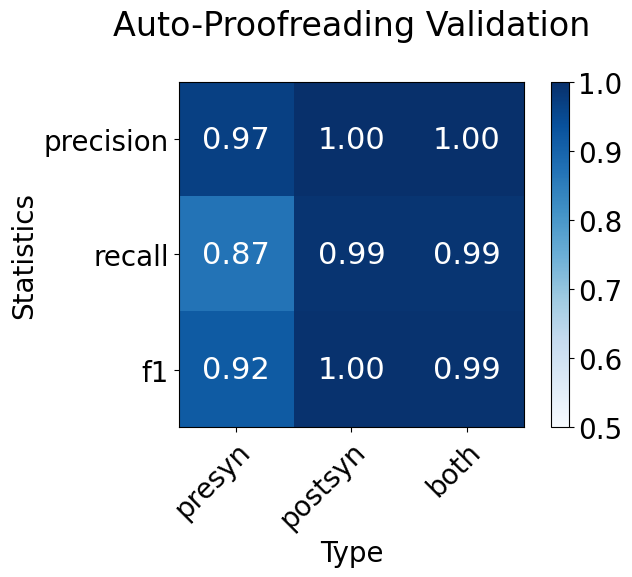

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691135735426708_validation_df.pbz2
File size is 0.075132 MB
Total time for neuron 864691135735426708: 235.75196719169617

--- Working on Neuron 864691135589907979 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate 0: [1180217.83950051  806216.75917429  989165.74480419]--------
kiss_check = True
winning_downstream = 8,error_downstream = [11 12] 
coordinate [1180217.83950051  806216.75917429  989165.74480419] had error branches [11 12]--------


 ----- Working on coordinate 1: [1181266.76099576  800202.03181104  988769.31380618]--------
kiss_check = True
winning_downstream = 16,error_downstream = [17  3] 
coordinate [1181266.76099576  800202.03181104  988769.31380618] had error branches [17  3]--------


 ----- Working on coordinate 2: [1202756.56199116  791408.14908579  998293.2836805 ]--------
kiss_check = True
winning_downstream = None,error_downstream

winning_downstream = 161,error_downstream = [182 183] 
coordinate [1300133.64117152  636932.97052826  869585.83456767] had error branches [182 183]--------


 ----- Working on coordinate 21: [1300865.35802516  623643.83897907  864649.28775733]--------
kiss_check = True
winning_downstream = 195,error_downstream = [186 193] 
coordinate [1300865.35802516  623643.83897907  864649.28775733] had error branches [186 193]--------


 ----- Working on coordinate 22: [1310336.49822667  611573.29692528  841902.26935296]--------
kiss_check = True
Working on Kissing check because possible upstream matches greater than 1: [201, 205]


winning_downstream = 201,error_downstream = [205 207] 
coordinate [1310336.49822667  611573.29692528  841902.26935296] had error branches [205 207]--------
limb_branch_dict_to_cancel = {'L1': array([ 11,  12,  17,   3,  39,  31,  45,  56,  59,  60,  33,  68,  69,
        72,  74,  75,  76,  50,  84,  88,  97,  99, 100, 101, 102, 103,
       104, 130, 114, 152, 118, 171, 172, 182, 183, 186, 193, 205, 207])}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
Apply the presyn non_error
For presyn: # valid synapses = 66, # error synapses  = 455, # error presyns = 40
For postsyn: # valid synapses = 3891, # error synapses  = 22, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 4434
n_valid_syn_ids_presyn = 66
n_errored_syn_ids_presyn = 455
n_valid_syn_ids_postsyn = 3891
n_errored_syn_ids_postsyn = 22
Segment Id = 864691135589907979
Postsyn counts:
TP:3887
TN:17
FP:4
FN:5
Presyn counts:
TP:38
TN:413
F

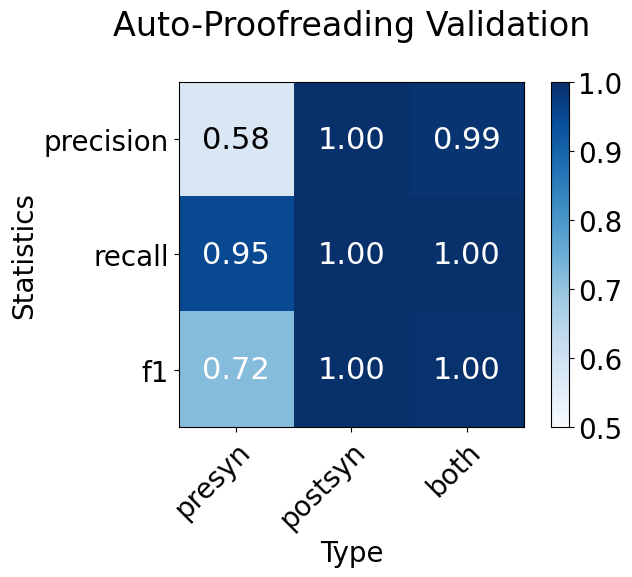

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691135589907979_validation_df.pbz2
File size is 0.089334 MB
Total time for neuron 864691135589907979: 233.91617250442505

--- Working on Neuron 864691136311791677 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate 0: [833027.34636694 758702.0865743  901936.25102521]--------
kiss_check = True
winning_downstream = 12,error_downstream = [13 16 18] 
coordinate [833027.34636694 758702.0865743  901936.25102521] had error branches [13 16 18]--------


 ----- Working on coordinate 1: [866250. 757323. 875952.]--------
kiss_check = True
winning_downstream = 54,error_downstream = [45 47] 
coordinate [866250. 757323. 875952.] had error branches [45 47]--------


 ----- Working on coordinate 2: [1221456.34204044  724568.28233463  977648.85747771]--------
kiss_check = True
Working on Kissing check because possible upstream matches greater than 1: [68, 71]


winning_downstream = 71,error_downstream = [69 72 68] 
coordinate [1221456.34204044  724568.28233463  977648.85747771] had error branches [69 72 68]--------


 ----- Working on coordinate 3: [1234341.   717316.9  981884.7]--------
kiss_check = True
winning_downstream = 76,error_downstream = [77 73] 
coordinate [1234341.   717316.9  981884.7] had error branches [77 73]--------


 ----- Working on coordinate 4: [1284898.   655602.1  970714.2]--------
kiss_check = True
Working on Kissing check because possible upstream matches greater than 1: [113, 116]
winning_downstream = 116,error_downstream = [128 113] 
coordinate [1284898.   655602.1  970714.2] had error branches [128 113]--------


 ----- Working on coordinate 5: [1291710.5062591   664413.84644955  966354.28707058]--------
kiss_check = True
winning_downstream = 143,error_downstream = [141 144] 
coordinate [1291710.5062591   664413.84644955  966354.28707058] had error branches [141 144]--------


 ----- Working on coordinate 6: [1293

** triggered kiss check cut becuase cut_bbox_longest_side = 217.72077876562253***
winning_downstream = 366,error_downstream = [380 381] 
coordinate [1355393.27713094  696790.72142921 1009867.11064488] had error branches [380 381]--------
limb_branch_dict_to_cancel = {'L1': array([ 13,  16,  18,  45,  47,  69,  72,  68,  77,  73, 128, 113, 141,
       144, 155, 146, 178, 182, 197, 199, 201, 181, 204, 205, 230, 233,
       239, 247, 234, 267, 255, 265, 276, 279, 270, 283, 287, 289, 277,
       354, 349, 361, 362, 358, 365, 367, 369, 380, 381])}
limb_branch_dict_to_cancel = {'L1': [52, 60]}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {'L1': [16], 'L3': [2, 11]}
limb_branch_dict_to_cancel = {'L1': [68, 63]}
Apply the presyn non_error
For presyn: # valid synapses = 136, # error synapses  = 310, # error presyns = 33
For postsyn: # valid synapses = 6884, # error synapses  = 129, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 7459
n_valid_syn_ids_presyn = 136

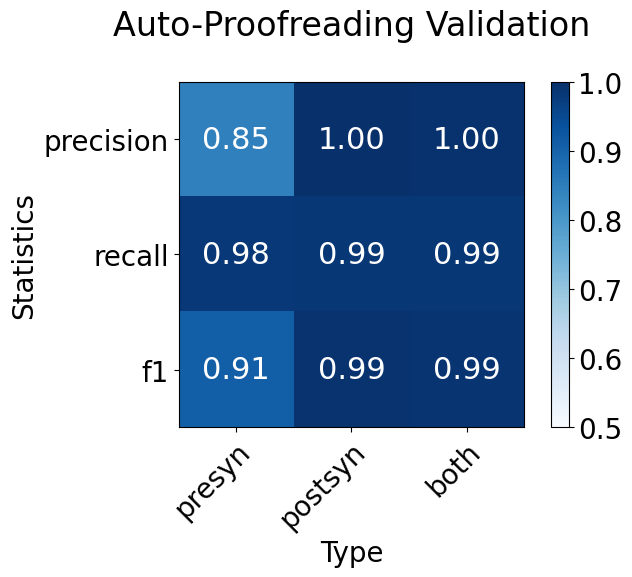

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691136311791677_validation_df.pbz2
File size is 0.147971 MB
Total time for neuron 864691136311791677: 588.8140079975128

--- Working on Neuron 864691135866394390 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate 0: [1169053.   553487.8  981425.8]--------
kiss_check = True
Working on Kissing check because possible upstream matches greater than 1: [47, 59]


** triggered kiss check cut becuase cut_bbox_longest_side = 286.61964683048427***
winning_downstream = 59,error_downstream = [65 47] 
coordinate [1169053.   553487.8  981425.8] had error branches [65 47]--------


 ----- Working on coordinate 1: [1173955.86270029  442756.23296947 1021484.03436415]--------
kiss_check = True
Working on Kissing check because possible upstream matches greater than 1: [92, 93]


winning_downstream = 92,error_downstream = [93 91] 
coordinate [1173955.86270029  442756.23296947 1021484.03436415] had error branches [93 91]--------


 ----- Working on coordinate 2: [1192234.27110897  643883.56195061  940473.45718232]--------
kiss_check = True
Changing max_degree_to_resolve = 8 because upstream width was 303.89874570976565 
winning_downstream = 126,error_downstream = [124 119] 
coordinate [1192234.27110897  643883.56195061  940473.45718232] had error branches [124 119]--------


 ----- Working on coordinate 3: [1199306.00817671  510376.33644948  980764.88730506]--------
kiss_check = True
winning_downstream = 145,error_downstream = [150 567 106] 
coordinate [1199306.00817671  510376.33644948  980764.88730506] had error branches [150 567 106]--------


 ----- Working on coordinate 4: [1202189.04336795  734088.78975018  959692.70483378]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [1202189.04336795  734088.78975018  959692.70483

winning_downstream = 257,error_downstream = [255 256] 
coordinate [1215845.78494975  487144.54796109  971927.86517703] had error branches [255 256]--------


 ----- Working on coordinate 11: [1216698.4567028   683689.96122938  922014.13157975]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [1216698.4567028   683689.96122938  922014.13157975] had error branches []--------


 ----- Working on coordinate 12: [1217926.15874862  475697.72072726  978002.19197187]--------
kiss_check = True
winning_downstream = 254,error_downstream = [268 269 230] 
coordinate [1217926.15874862  475697.72072726  978002.19197187] had error branches [268 269 230]--------


 ----- Working on coordinate 13: [1233205.05202035  682099.23597766  921866.82585262]--------
kiss_check = True
Working on Kissing check because possible upstream matches greater than 1: [301, 303]


** triggered kiss check cut becuase cut_bbox_longest_side = 177.73706139763817***
winning_downstream = 303,error_downstream = [301 249] 
coordinate [1233205.05202035  682099.23597766  921866.82585262] had error branches [301 249]--------


 ----- Working on coordinate 14: [1238010.26245072  682052.93955387  921264.25139995]--------
kiss_check = True
Working on Kissing check because possible upstream matches greater than 1: [328, 330]
winning_downstream = 330,error_downstream = [309 328] 
coordinate [1238010.26245072  682052.93955387  921264.25139995] had error branches [309 328]--------


 ----- Working on coordinate 15: [1240133.14018891  682976.46646182  927710.49105532]--------
kiss_check = True
winning_downstream = 290,error_downstream = [313 332] 
coordinate [1240133.14018891  682976.46646182  927710.49105532] had error branches [313 332]--------


 ----- Working on coordinate 16: [1243896.96898366  680430.8048346   921454.27504869]--------
kiss_check = True
winning_downstream = 3

** triggered kiss check cut becuase cut_bbox_longest_side = 247.42715136078186***
winning_downstream = 465,error_downstream = [457 468] 
coordinate [1300293.71530416  750316.46549561  971778.92161298] had error branches [457 468]--------


 ----- Working on coordinate 25: [1300649.12558809  497602.26803224  917413.44831062]--------
kiss_check = True
winning_downstream = 469,error_downstream = [461 463 464] 
coordinate [1300649.12558809  497602.26803224  917413.44831062] had error branches [461 463 464]--------


 ----- Working on coordinate 26: [1307398.23027724  700232.40269463  902183.70304583]--------
kiss_check = True
winning_downstream = 481,error_downstream = [477 480] 
coordinate [1307398.23027724  700232.40269463  902183.70304583] had error branches [477 480]--------


 ----- Working on coordinate 27: [1308355.33906506  701219.17619386  902322.19686152]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [1308355.33906506  701219.17619386  9023

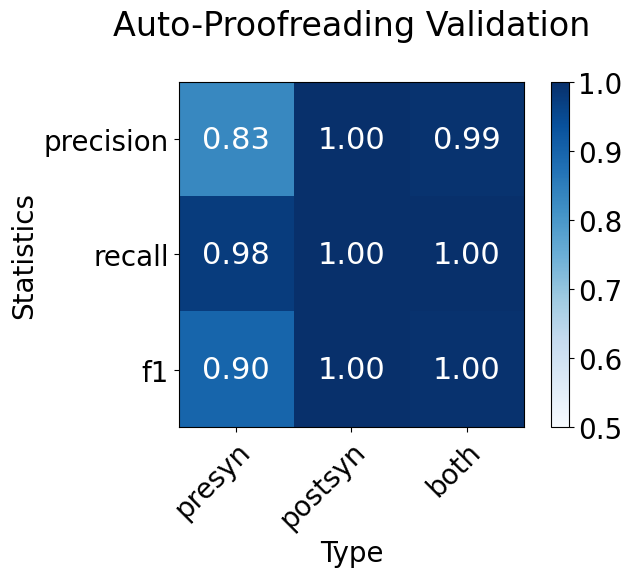

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691135866394390_validation_df.pbz2
File size is 0.197288 MB
Total time for neuron 864691135866394390: 494.73197174072266

--- Working on Neuron 864691135699269154 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate 0: [1309321.39007609  914713.82912712  816313.38108701]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [1309321.39007609  914713.82912712  816313.38108701] had error branches []--------


 ----- Working on coordinate 1: [1317823.07293151  976683.79400696  857337.88269294]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [1317823.07293151  976683.79400696  857337.88269294] had error branches []--------


 ----- Working on coordinate 2: [1318812.59518286  975232.71027136  856659.44339789]--------
kiss_check = True
Changing max_degree_to_resolve = 8 because upstream width

winning_downstream = 135,error_downstream = [136  93] 
coordinate [1382372.10387514  934390.20972114  806131.62126122] had error branches [136  93]--------


 ----- Working on coordinate 10: [1401311.96936599  948836.19612887  795698.71001319]--------
kiss_check = True
winning_downstream = 142,error_downstream = [139 141] 
coordinate [1401311.96936599  948836.19612887  795698.71001319] had error branches [139 141]--------


 ----- Working on coordinate 11: [1407238.07606667  930243.51231102  775497.17200447]--------
kiss_check = True
winning_downstream = 146,error_downstream = [144 145] 
coordinate [1407238.07606667  930243.51231102  775497.17200447] had error branches [144 145]--------


 ----- Working on coordinate 12: [1421211.   940350.   782554.4]--------
kiss_check = True
winning_downstream = 162,error_downstream = [165 159] 
coordinate [1421211.   940350.   782554.4] had error branches [165 159]--------


 ----- Working on coordinate 13: [1432955.03412145  931373.89075854  75222

** triggered kiss check cut becuase cut_bbox_longest_side = 317.73887264123186***
winning_downstream = 213,error_downstream = [214 215 216] 
coordinate [1463522.71090208  900593.04653822  720904.48948505] had error branches [214 215 216]--------
limb_branch_dict_to_cancel = {'L0': array([ 46,  47,  50,  74,  75,  77,  79, 111, 114, 126, 131, 136,  93,
       139, 141, 144, 145, 165, 159, 169, 178, 175, 183, 185, 186, 181,
       187, 177, 192, 176, 202, 203, 207, 211, 214, 215, 216])}
limb_branch_dict_to_cancel = {'L0': [70, 78]}
limb_branch_dict_to_cancel = {'L0': array([65, 66])}
limb_branch_dict_to_cancel = {'L0': [64, 65, 63, 93], 'L1': [14], 'L3': [9], 'L4': [3]}
limb_branch_dict_to_cancel = {}
Apply the presyn non_error
For presyn: # valid synapses = 7, # error synapses  = 178, # error presyns = 37
For postsyn: # valid synapses = 4562, # error synapses  = 36, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 4783
n_valid_syn_ids_presyn = 7
n_errored_syn_ids_presyn 

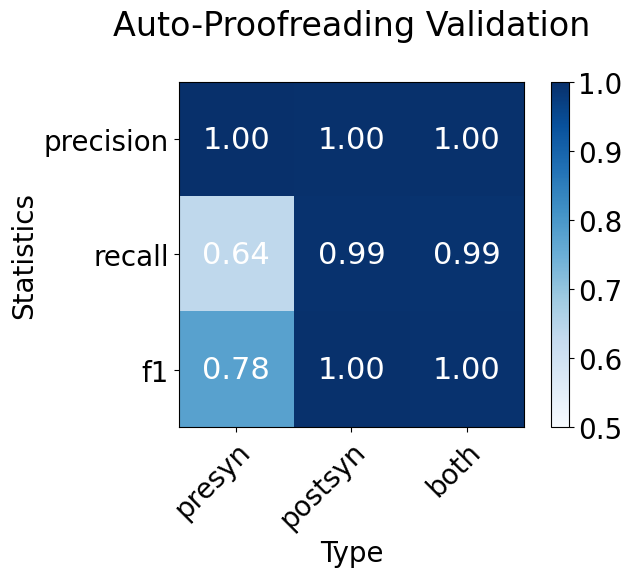

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691135699269154_validation_df.pbz2
File size is 0.09596 MB
Total time for neuron 864691135699269154: 271.6472990512848


In [9]:
for seg_id in segments_to_process:
    print(f"\n--- Working on Neuron {seg_id} --")
    st = time.time()
    
    
    #1) Dwonload the neuron object
    neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                       border_validation=True)
    
    (filt_neuron,
     return_synapse_df_revised,
    return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = pru.v4_exc_filters(),
                        plot_limb_branch_filter_with_disconnect_effect = False,
                        verbose = False,
                        plot_score=False)
    
    vu.synapse_validation_df_to_score_plot(return_validation_df_revised)
    
    su.compressed_pickle(return_validation_df_revised,f"./validation_data/{seg_id}_validation_df")
    
    print(f"Total time for neuron {seg_id}: {time.time() - st}")